##### Arturo Perez 
##### Professor Koutsoukos 
##### CS 3891 Assignment 2
##### 6 February 2018 

## Preprocessing 
###### In this section we take care of preprocessing the MNIST data set.

We start by reading in the MNIST data set. We seperate the training and testing data into four buffers.

In [116]:
import os
import numpy as np
import struct
import matplotlib.pyplot as plt
from mnist import MNIST

# the training set is stored in this directory
path = "/Users/Arturo1/Desktop/Vanderbilt/2017-2018/Spring 2018/Deep Learning 3891/handwriting"

# load the MNIST data
mndata = MNIST(path)
train_images, train_labels = mndata.load_training() # training data
test_images, test_labels = mndata.load_testing() # testing data


We continue by reshaping/rescaling the images and labels of both the training and test data.

In [117]:
# convert to (28x28,1) column vector and divide by 255
training_size, test_size = 60000, 10000   

train_images = np.array(train_images[:training_size], dtype=float).transpose() / 255
train_labels = np.array(train_labels[:training_size], dtype=float)
test_images = np.array(test_images[:test_size], dtype=float).transpose() / 255
test_labels = np.array(test_labels[:test_size], dtype = float)
train_labels = np.reshape(train_labels, (training_size, 1))
test_labels = np.reshape(test_labels, (test_size, 1))

Because we want to predict whether a new image is equal to ID or not, we change the labels from train_labels and test_labels to be either 1 if they are equal to ID, or 0 if they are not. This will help us make our predictions later on and calculate the accuracy/error rates. In my case, ID is equal to 6. 

In [118]:
# student ID
ID = 6
# change the labels to either 0 or 1
def relabel(label):
    for l in label:
        if (l[0] == ID):
            l[0] = 1
        else:
            l[0] = 0
            
relabel(train_labels)
relabel(test_labels)

We complete preprocessing by creating smaller training sets of the training set for later use.

In [119]:
# creating smaller data sets of differing size and differing data
# subset1 of 10 samples
subsetOneImages = train_images[:,:10]
ID_labels1 = train_labels[:10,:]

# subset2 of 75 samples
subsetTwoImages = train_images[:,25:100]
ID_labels2 = train_labels[25:100,:]

# subset 3 of 1,000 samples
subsetThreeImages = train_images[:,200:1200]
ID_labels3 = train_labels[200:1200,:]

# subset 4 of 10,000 samples
subsetFourImages = train_images[:,10000:20000]
ID_labels4 = train_labels[10000:20000,:]

## Learning
###### In this section we use the vectorized implementation, plot the learning curve, and investigate the impact of the learning rate.

Vectorized implementation of Logistic Gradient Descent. LGD function will also plot cost curve. The equations used respectively: 

###### Logistic Gradient Descent
$z = w^Tx + b$ 

$a = \sigma (z) $
###### Cost Function
$J(w,b) = -{1 \over m} \sum\limits_{1=1}^{m} (y log(a) + (1 - y)log(1 - a) $
###### Update Parameters
$ dW = {1 \over m} (\mathbf{X}dZ^T) $

$ dB = {1 \over m} sum(dZ) $

$ w = w - \alpha dW $

$ b = b - \alpha dB $

where $\alpha$ is the learning rate 

In [120]:
# Logistic Gradient Descent
def LGD(samples, X, y, alpha):
    # define weights
    costs = []
    m = X.shape[1]
    w = np.zeros((X.shape[0], 1))
    b = np.zeros((1, 1))

    for i in range(0, 1000):
        z = (w.transpose() @ X) + b
        a = 1 / (1 + np.exp(-z))
        dZ = a - y.transpose()

        # compute cost function
        cost = 0
        cost = (-1/m) * np.sum(y.transpose() * np.log(a) + (1 - y.transpose()) * np.log(1 - a))
        costs.append(cost)

        # update parameters 
        dW = (1/m) * (X @ dZ.transpose())
        dB = (1/m) * np.sum(dZ)
        w = w - (alpha*dW)
        b = b - (alpha*dB)

    # plot cost function
    plt.plot(costs)
    plt.title("Student ID Cost Function (" + str(samples) + " samples)")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()

    return(w, b) # return weights

Now we investigate the impact of differing sized training sets, differing learning rates alpha. In general by looking at my cost functions, as the learning rate alpha increases, the cost function becomes less rounded and more flat. Data sets with larger sample sizes have rounder cost functions.

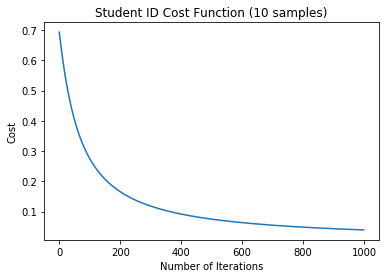

In [121]:
# investigate the impact of the training data size and the learning rate alpha 
w,b = LGD(10, subsetOneImages, ID_labels1, .001) #10 samples, alpha = .001

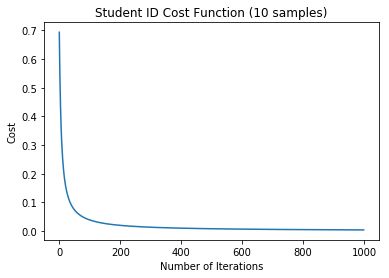

In [122]:
w,b = LGD(10, subsetOneImages, ID_labels1, .01) #10 samples, alpha = .01

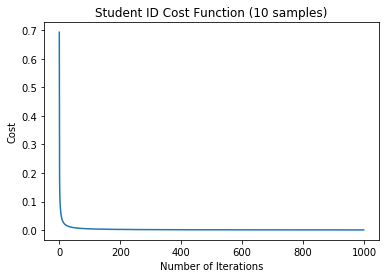

In [123]:
w,b = LGD(10, subsetOneImages, ID_labels1, .1) #10 samples, alpha = .1

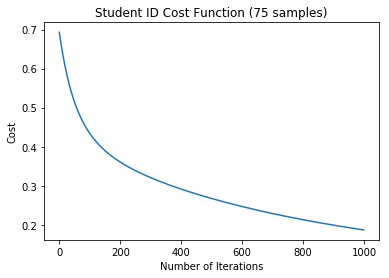

In [124]:
w,b = LGD(75, subsetTwoImages, ID_labels2, .001) #75 samples, alpha = .001

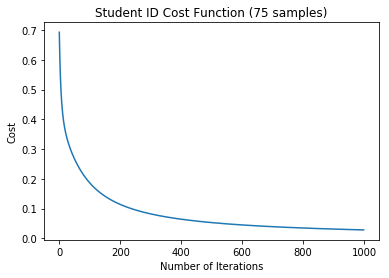

In [125]:
w,b = LGD(75, subsetTwoImages, ID_labels2, .01) #75 samples, alpha = .01

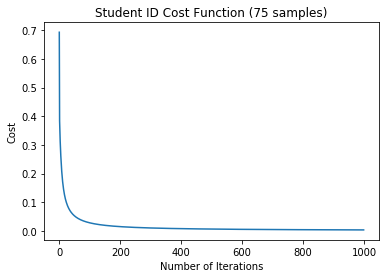

In [126]:
w,b = LGD(75, subsetTwoImages, ID_labels2, .1) #75 samples, alpha = .1

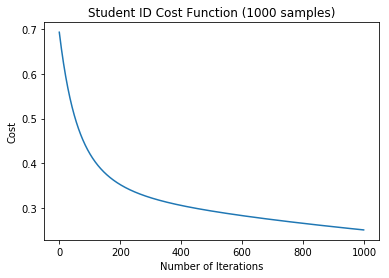

In [127]:
w,b = LGD(1000, subsetThreeImages, ID_labels3, .001) #1000 samples, alpha = .001

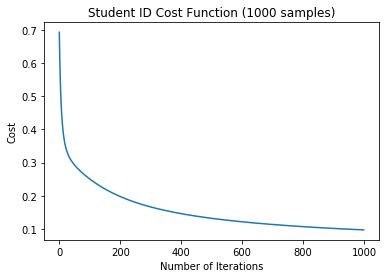

In [128]:
w,b = LGD(1000, subsetThreeImages, ID_labels3, .01) #1000 samples, alpha = .01

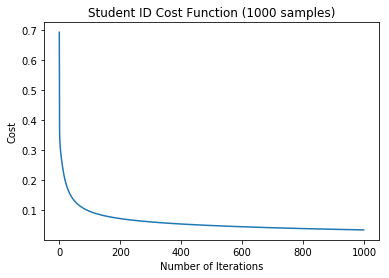

In [129]:
w,b = LGD(1000, subsetThreeImages, ID_labels3, .1) #1000 samples, alpha = .1

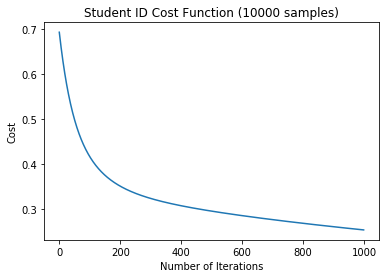

In [130]:
w,b = LGD(10000, subsetFourImages, ID_labels4, .001) #10000 samples, alpha = .001

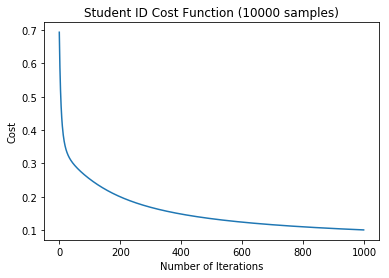

In [131]:
w,b = LGD(10000, subsetFourImages, ID_labels4, .01) #10000 samples, alpha = .01

## Evaluation

We will now train the model with all 60,000 samples to get weights w and b respectively.

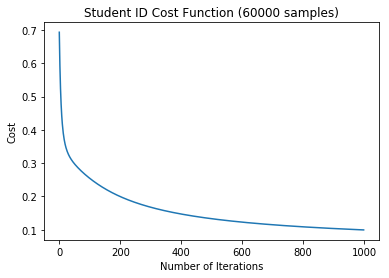

In [132]:
w, b = LGD(60000, train_images, train_labels, .01)

We now test our weights w and b with the test images x and generate zTest per the equation $zTest = w^Tx + b$ 

In [133]:
# using our weights generated from the 60,000 sample training and the testing images, calculate zTest
zTest = (w.transpose() @ test_images) + b

Using zTest, we compute our accuracy and error rates. We first scale all the values of zTest to be either 1 or 0, then compare zTest to test_labels and keep a count of the number of similarities between zTest and test_labels. The higher our similarity count, the better our logistic model is predicting. 

In [134]:
# make zTestLabels a vector only of 1's and 0's
zTestLabels = np.array([1 if z[0] > 0 else 0 for z in zTest.T])

# how similar is zTestLabels and test_labels?
count = 0
for i in range(1,10000):
    if zTestLabels[i] == test_labels[i]:
        count += 1

We conclude by calculating and printing the respective accuracy and error rates as predicted by our model.

In [135]:
# calculate accuracy and error rates
accuracy = (count/10000) * 100
error_rate = 100 - accuracy
print("accuracy for ID = " + str(ID) + " is : " + str(accuracy) + "%")
print("error rate for ID = " + str(ID) + " is : " + str(error_rate) + "%")

accuracy for ID = 6 is : 97.36%
error rate for ID = 6 is : 2.6400000000000006%
